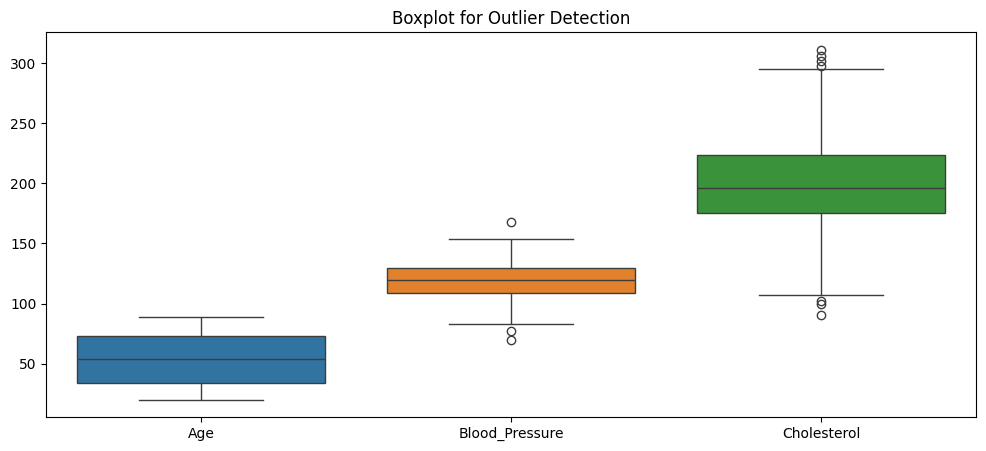

Cleaned dataset saved as cleaned_healthcare_data.csv


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic healthcare dataset
def generate_healthcare_data(num_records=200):
    np.random.seed(42)

    # Generate synthetic data
    patient_ids = np.arange(1, num_records + 1)
    ages = np.random.randint(20, 90, num_records)
    blood_pressure = np.random.normal(120, 15, num_records)
    blood_pressure[np.random.choice(num_records, 10, replace=False)] = np.nan  # Inject missing values
    cholesterol = np.random.normal(200, 40, num_records)
    cholesterol[np.random.choice(num_records, 5, replace=False)] = np.nan  # Inject missing values
    disease = np.random.choice(['Diabetes', 'Hypertension', 'Heart Disease', 'None'], num_records)
    disease[5] = 'Hpertension'  # Introduce inconsistency
    disease[10] = 'diabetes'     # Introduce inconsistency

    data = pd.DataFrame({
        'Patient_ID': patient_ids,
        'Age': ages,
        'Blood_Pressure': blood_pressure,
        'Cholesterol': cholesterol,
        'Disease': disease
    })

    return data

# Handle missing values
def handle_missing_values(df):
    df = df.copy()
    df.loc[:, 'Blood_Pressure'] = df['Blood_Pressure'].fillna(df['Blood_Pressure'].mean())
    df.loc[:, 'Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())
    return df

# Fix inconsistencies
def standardize_disease_names(df):
    df = df.copy()
    df.loc[:, 'Disease'] = df['Disease'].str.lower().str.replace('hpertension', 'hypertension')
    df.loc[:, 'Disease'] = df['Disease'].str.capitalize()
    return df

# Remove outliers (Z-score method)
def remove_outliers(df):
    from scipy.stats import zscore
    df = df[np.abs(zscore(df[['Age', 'Blood_Pressure', 'Cholesterol']])) < 3].all(axis=1)
    return df

# Visualize data distribution
def visualize_data(df):
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df[['Age', 'Blood_Pressure', 'Cholesterol']])
    plt.title("Boxplot for Outlier Detection")
    plt.show()

# Main execution
healthcare_data = generate_healthcare_data()
healthcare_data = handle_missing_values(healthcare_data)
healthcare_data = standardize_disease_names(healthcare_data)
visualize_data(healthcare_data)
healthcare_data = remove_outliers(healthcare_data)

# Save cleaned dataset
healthcare_data.to_csv("cleaned_healthcare_data.csv", index=False)
print("Cleaned dataset saved as cleaned_healthcare_data.csv")
